<a href="https://colab.research.google.com/github/sanmevv/Turkey-Earthquake-NLP-ML/blob/main/Preprocessing2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q -U --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 972.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
from collections import Counter
import re

from sklearn.model_selection import train_test_split

from pycaret.classification import *

from imblearn.over_sampling import SMOTE

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [144]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/data.csv')

In [145]:
data.head()

,Unnamed: 0,Tweet_id,Date,Tweet,Source,Language,User_id,Location,Acctdesc,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Url,Target,Username
0,0,1644584329463361536,2023-04-08 06:13:53,Date and time (UTC): 04/08/2023 08:03:11 AM\nM...,Twitter Web App,en,1.001341e+18,Egypt,Gathering and tweeting the most recent earthqu...,0.0,0.0,0.0,"['#earthquake', '#USGS', '#CA', '#StaySafe']",160.0,40.0,95.0,https://twitter.com/Iwillsolo/status/164458432...,True,NaN
1,1,1644584192288735234,2023-04-08 06:13:20,#Earthquake (#地震) M3.8 strikes 26 km NW of #Sa...,Twitter for Android,en,1.376006e+18,México,"Información al instante, reportes sismicos, no...",0.0,0.0,0.0,"['#Earthquake', '#地震', '#Saitama', '#Japan']",1432.0,979.0,60472.0,https://twitter.com/Edgaroficial02/status/1644...,True,NaN
2,2,1644584189789089792,2023-04-08 06:13:20,@Bergermeister23 Its a MEGA - Massive Earthqua...,Twitter Web App,en,1.510219e+18,NaN,NaN,0.0,0.0,0.0,[],177.0,100.0,20299.0,https://twitter.com/TUAtwit/status/16445841897...,True,NaN
3,3,1644584158218313729,2023-04-08 06:13:12,@_teawithtiff Lmao nah fr they go HARD and nee...,Twitter for iPhone,en,2.460890e+08,NaN,Poet 📝 |BLACK AF | RIP MOM & DAD 💔💜✨🙏🏿|Mental ...,0.0,0.0,0.0,[],3197.0,4285.0,103515.0,https://twitter.com/EarthQuake_HK15/status/164...,False,NaN
4,4,1644583869956648960,2023-04-08 06:12:04,89 Earthquake,Twitter for iPhone,en,7.928967e+17,NaN,do my own stunts | thetable.,0.0,0.0,0.0,[],460.0,528.0,33489.0,https://twitter.com/itsblanc0baby/status/16445...,True,NaN


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629860 entries, 0 to 629859
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    629860 non-null  int64  
 1   Tweet_id      629859 non-null  object 
 2   Date          629859 non-null  object 
 3   Tweet         629857 non-null  object 
 4   Source        629854 non-null  object 
 5   Language      629854 non-null  object 
 6   User_id       629854 non-null  float64
 7   Location      418397 non-null  object 
 8   Acctdesc      551690 non-null  object 
 9   Replies       629517 non-null  float64
 10  Retweets      629517 non-null  float64
 11  Likes         629517 non-null  float64
 12  Hashtags      629517 non-null  object 
 13  Following     629513 non-null  float64
 14  Followers     629513 non-null  float64
 15  Total_tweets  629513 non-null  float64
 16  Url           629513 non-null  object 
 17  Target        629860 non-null  bool   
 18  User

In [147]:
data = data.drop(columns=['Unnamed: 0'])


In [148]:
data.isna().any()

Tweet_id         True
Date             True
Tweet            True
Source           True
Language         True
User_id          True
Location         True
Acctdesc         True
Replies          True
Retweets         True
Likes            True
Hashtags         True
Following        True
Followers        True
Total_tweets     True
Url              True
Target          False
Username         True
dtype: bool

In [149]:
import re
import string

In [150]:
#Preprocessing Function
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)

    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()

    # Remove extra whitespace
    text = re.sub('\s+', ' ', text).strip()

    return text

In [151]:
import re

def preprocess_text(text):
    if isinstance(text, str):
        # apply regular expressions and other string operations
        text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
        text = re.sub(r'\d+', '', text)  # remove digits
        text = text.lower()  # convert to lowercase
        text = text.strip()  # remove leading/trailing whitespaces
        return text
    else:
        # handle cases where input is not a string (e.g., missing values)
        return ''


In [152]:
if data['Tweet'].dtype != 'object':
    data['Tweet'] = data['Tweet'].astype(str)


In [153]:
data['Tweet'] = data['Tweet'].apply(preprocess_text)

Commonly Used Words

In [154]:

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

import nltk
from nltk.corpus import stopwords

In [155]:
# Concatenate all tweet texts into a single string
all_text = ' '.join(data['Tweet'].values)

In [156]:
# Remove URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)

In [157]:
# Split the text into individual words
words = all_text.split()

Remove stop words

In [158]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [159]:
# Count the frequency of each word
word_counts = Counter(words)

In [160]:
top_words = word_counts.most_common(100)
top_words

[('earthquake', 282340),
 ('football', 131470),
 ('turkey', 103280),
 ('kardashian', 68569),
 ('earthquakes', 49387),
 ('usa', 40938),
 ('ð', 37200),
 ('like', 37194),
 ('people', 36680),
 ('syria', 36035),
 ('km', 35562),
 ('kim', 35248),
 ('amp', 31982),
 ('magnitude', 30785),
 ('one', 26923),
 ('time', 22928),
 ('us', 22312),
 ('new', 21066),
 ('ago', 19483),
 ('get', 19392),
 ('game', 18836),
 ('know', 17718),
 ('would', 16128),
 ('see', 15685),
 ('good', 15103),
 ('dont', 14899),
 ('strikes', 14833),
 ('info', 14827),
 ('world', 14595),
 ('news', 14413),
 ('even', 13889),
 ('think', 13720),
 ('arsenal', 13703),
 ('min', 13654),
 ('utc', 13628),
 ('team', 13605),
 ('felt', 13169),
 ('â', 13117),
 ('help', 13104),
 ('pakistan', 12658),
 ('need', 12644),
 ('via', 12396),
 ('go', 12283),
 ('everyone', 12266),
 ('last', 12245),
 ('hit', 12233),
 ('today', 11946),
 ('victims', 11920),
 ('still', 11915),
 ('league', 11894),
 ('back', 11765),
 ('another', 11504),
 ('support', 11423),
 ('p

Create a bar chart of the most common words

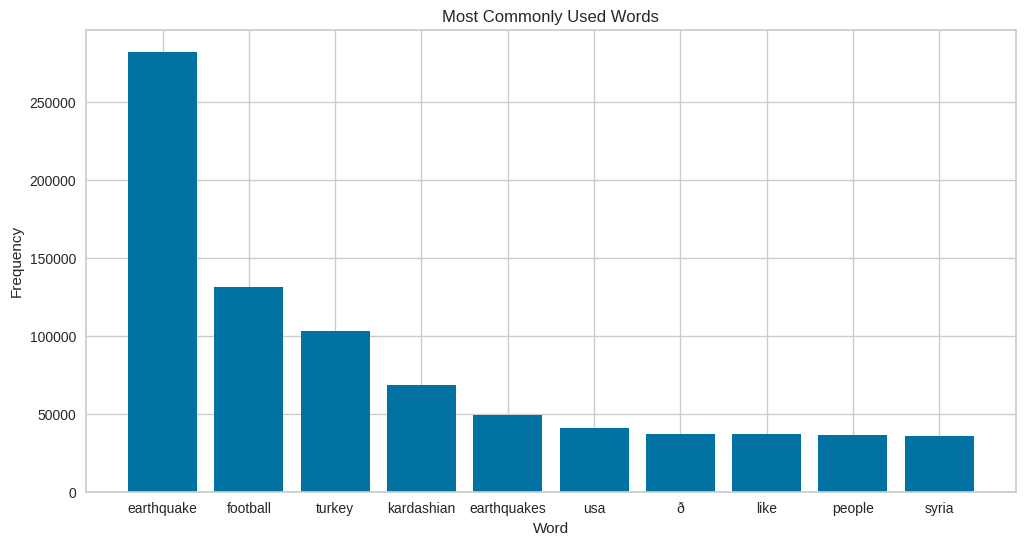

In [161]:
top_words = word_counts.most_common(10) # Change the number to show more/less words
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.figure(figsize=(12, 6))
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

Creating Classes for Tweets:

"Help": Tweets that express a need for assistance or ask for help, such as:

"We need supplies and shelter for the earthquake victims"

"Please help those affected by the earthquake by donating to relief efforts"

"News": Tweets that share information about the earthquake or its aftermath, such as:

"Magnitude 6.8 earthquake strikes Turkey and Syria"

"Rescue teams continue to search for survivors in the rubble"

"Funding": Tweets that promote or discuss fundraising efforts for earthquake relief, such as:

"Join our fundraising campaign to help those affected by the earthquake"

"Which charities are accepting donations for the earthquake relief efforts?"

"Survivor stories": Tweets that share personal accounts or experiences of the earthquake, such as:

"I was in the middle of a meeting when the earthquake hit. It was the scariest moment of my life"

"My family and I are safe, but our house was severely damaged in the earthquake"

"Volunteering": Tweets that promote or discuss volunteer efforts for earthquake relief, such as:

"We need volunteers to help with search and rescue operations in the affected areas"

"If you want to help, consider volunteering at a local shelter or distribution center"

"Political response": Tweets that discuss the government or political response to the earthquake, such as:

"The government needs to do more to support the earthquake victims and rebuild the affected areas"

"I'm disappointed in the lack of action from our elected officials regarding the earthquake relief efforts"

"Humanitarian aid": Tweets that discuss or promote humanitarian aid efforts for the earthquake, such as:

"The Red Cross is on the ground providing emergency relief to those affected by the earthquake"

"International aid organizations are stepping up to help with the earthquake recovery efforts"

Safety information: Tweets that provide information about how to stay safe during or after the earthquake, such as:

"Remember to drop, cover, and hold on during an earthquake to protect yourself from falling objects"

"Be careful of aftershocks and potential hazards like gas leaks and downed power lines"

Infrastructure damage: Tweets that describe the damage to buildings, roads, and other infrastructure caused by the earthquake, such as:

"The earthquake caused a major bridge to collapse, cutting off access to the affected area"

"Many buildings in the city center were severely damaged or destroyed by the earthquake"

Psychological impact: Tweets that discuss the emotional toll of the earthquake on survivors and first responders, such as:

"Trauma from the earthquake can have long-lasting effects on mental health. Make sure to seek support if you need it"

"The stress and exhaustion of working in earthquake relief can take a toll on first responders. Let's show them our support"

Animal rescue: Tweets that promote or discuss efforts to rescue and care for animals affected by the earthquake, such as:

"Many pets and farm animals have been separated from their owners or injured in the earthquake. Let's support animal rescue organizations"

"If you're looking for ways to help earthquake victims, consider donating to organizations that are rescuing and caring for animals"

In [162]:
# Define the classes and their corresponding keywords
classes = {
    'Help': ['help', 'assistance', 'support', 'donate'],
    'News': ['earthquake', 'magnitude', 'aftershock', 'rescue', 'recovery'],
    'Funding': ['fundraiser', 'donation', 'charity', 'fund'],
    'Survivor stories': ['survivor', 'personal account', 'experience', 'impact'],
    'Volunteering': ['volunteer', 'helping', 'aid', 'support'],
    'Political response': ['government', 'political', 'action', 'response'],
    'Humanitarian aid': ['humanitarian', 'aid', 'relief', 'support'],
    'Casualty reports': ['injury', 'death', 'fatal', 'missing', 'victims'],
    'Infrastructure damage': ['building', 'bridge', 'road', 'power', 'water', 'gas', 'telecommunications'],
    'Weather conditions': ['storm', 'rain', 'snow', 'wind', 'temperature', 'weather'],
    'Emergency services': ['ambulance', 'fire', 'police', 'emergency', 'rescue'],
    'Social media activity': ['tweet', 'post', 'share', 'social media'],
    'Prayer and condolences': ['prayer', 'thoughts', 'condolences', 'sympathy'],
    'Technical information': ['data', 'statistics', 'analysis', 'technical'],
    'International aid': ['international', 'donor', 'aid', 'relief'],
    'Business impact': ['business', 'economic', 'financial', 'impact'],
    'Personal safety': ['safety', 'evacuation', 'shelter', 'protection', 'precaution']
}

# Define a function to label each tweet based on its content
def classify_tweet(tweet_text):
    for class_name, keywords in classes.items():
        for keyword in keywords:
            if keyword in tweet_text:
                return class_name
    return 'Other'  # If no keyword matches, label as "Other"

# Add a new column to the dataframe with the class label for each tweet
data['Class'] = data['Tweet'].apply(classify_tweet)



In [163]:
data.to_csv('labeled_tweets.csv', index=False)

In [164]:
data

,Tweet_id,Date,Tweet,Source,Language,User_id,Location,Acctdesc,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Url,Target,Username,Class
0,1644584329463361536,2023-04-08 06:13:53,date and time utc am\nmagnitude mb\narea km...,Twitter Web App,en,1.001341e+18,Egypt,Gathering and tweeting the most recent earthqu...,0.0,0.0,0.0,"['#earthquake', '#USGS', '#CA', '#StaySafe']",160.0,40.0,95.0,https://twitter.com/Iwillsolo/status/164458432...,True,NaN,News
1,1644584192288735234,2023-04-08 06:13:20,earthquake 地震 m strikes km nw of saitama japa...,Twitter for Android,en,1.376006e+18,México,"Información al instante, reportes sismicos, no...",0.0,0.0,0.0,"['#Earthquake', '#地震', '#Saitama', '#Japan']",1432.0,979.0,60472.0,https://twitter.com/Edgaroficial02/status/1644...,True,NaN,News
2,1644584189789089792,2023-04-08 06:13:20,bergermeister its a mega massive earthquake g...,Twitter Web App,en,1.510219e+18,NaN,NaN,0.0,0.0,0.0,[],177.0,100.0,20299.0,https://twitter.com/TUAtwit/status/16445841897...,True,NaN,News
3,1644584158218313729,2023-04-08 06:13:12,_teawithtiff lmao nah fr they go hard and need...,Twitter for iPhone,en,2.460890e+08,NaN,Poet 📝 |BLACK AF | RIP MOM & DAD 💔💜✨🙏🏿|Mental ...,0.0,0.0,0.0,[],3197.0,4285.0,103515.0,https://twitter.com/EarthQuake_HK15/status/164...,False,NaN,Social media activity
4,1644583869956648960,2023-04-08 06:12:04,earthquake,Twitter for iPhone,en,7.928967e+17,NaN,do my own stunts | thetable.,0.0,0.0,0.0,[],460.0,528.0,33489.0,https://twitter.com/itsblanc0baby/status/16445...,True,NaN,News
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629855,1626924496086044673,2023-02-18 12:40:01,bbc news footballer christian atsu found dead...,Twitter for Android,en,3.029408e+09,"Peckham, London, England, UK",PECKHAM TOWN CENTRE NEWS ...,0.0,0.0,1.0,[],3270.0,1128.0,15802.0,https://twitter.com/PeckhamBusiness/status/162...,True,PeckhamBusiness,News
629856,1626924491417714688,2023-02-18 12:40:00,more than people have been killed in the eart...,TweetDeck,en,1.544838e+07,Makati City,"Balanced News, Fearless Views. inquirer.net",0.0,0.0,3.0,[],1809.0,3734361.0,1160223.0,https://twitter.com/inquirerdotnet/status/1626...,True,inquirerdotnet,News
629857,1626924440469798913,2023-02-18 12:39:48,shab_e_meraj\nkeep remembering in your prayers...,Twitter Web App,en,1.208842e+18,NaN,Muslim \nPakistani ÃÂ°ÃÂÃÂÃÂµÃÂ°ÃÂÃÂ...,0.0,2.0,5.0,['#Shab_e_Meraj'],139.0,223.0,2909.0,https://twitter.com/Lea_dot12/status/162692444...,True,Lea_dot12,News
629858,1626924335331000321,2023-02-18 12:39:22,bbc sport\n\nfootballer christian atsu has bee...,Twitter for Android,en,4.224889e+08,World Wide Online,"We connect people, to the right people. You wa...",0.0,0.0,9.0,[],4964.0,3503.0,16643.0,https://twitter.com/ConnectZM/status/162692433...,True,ConnectZM,News


Creating a bar plot of the class distribution

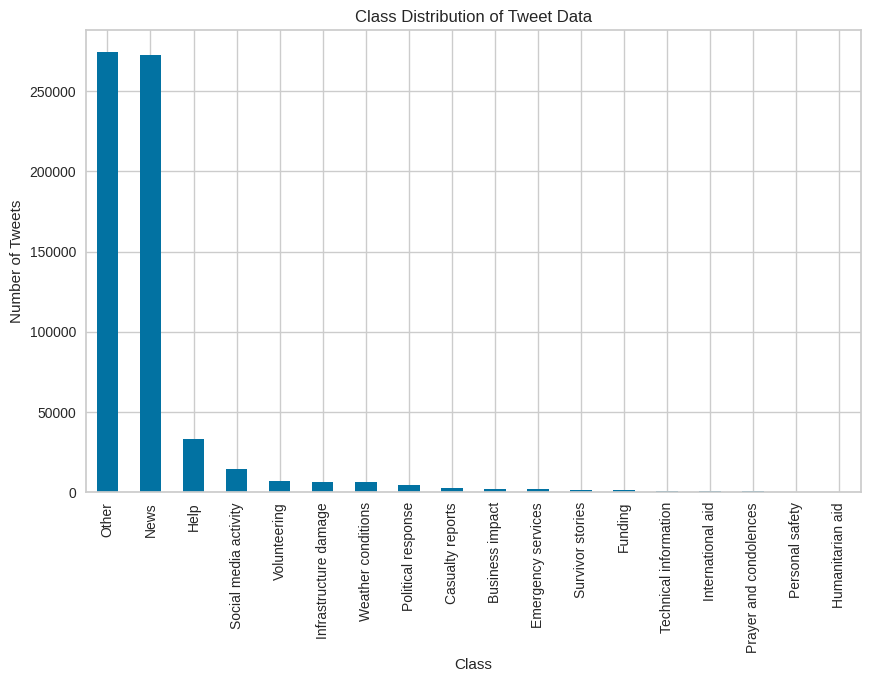

In [165]:

plt.figure(figsize=(10, 6))
class_counts = data['Class'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Tweet Data')
plt.xlabel('Class')
plt.ylabel('Number of Tweets')
plt.show()


In [166]:
data.columns

Index(['Tweet_id', 'Date', 'Tweet', 'Source', 'Language', 'User_id',
       'Location', 'Acctdesc', 'Replies', 'Retweets', 'Likes', 'Hashtags',
       'Following', 'Followers', 'Total_tweets', 'Url', 'Target', 'Username',
       'Class'],
      dtype='object')

In [167]:
data['Tweet'].isna().sum()

0

In [168]:
data.shape

(629860, 19)

In [169]:
data.dropna(axis = 1, inplace = True)

In [170]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Tweet'])
y = data['Class']

Simple Prediction of Classes

In [171]:

# Sample input tweet
input_tweet = "Prayers and thoughts for everyone affected by the #earthquake that just hit our city. Stay safe and seek shelter if necessary." #naturaldisaster #safetyfirst

# Classify the tweet
predicted_class = classify_tweet(input_tweet)

# Print the predicted class
print('Predicted class:', predicted_class)

Predicted class: News


In [172]:
data 

,Tweet,Target,Class
0,date and time utc am\nmagnitude mb\narea km...,True,News
1,earthquake 地震 m strikes km nw of saitama japa...,True,News
2,bergermeister its a mega massive earthquake g...,True,News
3,_teawithtiff lmao nah fr they go hard and need...,False,Social media activity
4,earthquake,True,News
...,...,...,...
629855,bbc news footballer christian atsu found dead...,True,News
629856,more than people have been killed in the eart...,True,News
629857,shab_e_meraj\nkeep remembering in your prayers...,True,News
629858,bbc sport\n\nfootballer christian atsu has bee...,True,News


In [173]:
data.to_csv('tweet_data_labeled2.csv')